<a aria-label="Meta home" href="https://www.llama.com/docs" tabindex="0" target="_blank" >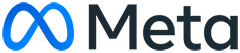</a>

# Build with Llama 4 Scout
<p align="center">
	<a href="https://llama.developer.meta.com/?utm_source=llama-cookbook&utm_medium=readme&utm_campaign=main"><img src="https://img.shields.io/badge/Llama_API-Sign_up-4BA9FE?logo=meta" /></a>
	<a href="https://llama.developer.meta.com/docs?utm_source=llama-cookbook&utm_medium=readme&utm_campaign=main"><img src="https://img.shields.io/badge/Llama_API-Documentation-E4E6Eb?logo=meta" /></a>
</p>
<p align="center">
	<a href="https://github.com/meta-llama/llama-models/blob/main/models/?utm_source=llama-cookbook&utm_medium=readme&utm_campaign=main"><img alt="Llama Model cards" src="https://img.shields.io/badge/Llama-Model_cards-green?logo=meta" /></a>
	<a href="https://www.llama.com/docs/overview/?utm_source=llama-cookbook&utm_medium=readme&utm_campaign=main"><img alt="Llama Documentation" src="https://img.shields.io/badge/Llama-Documentation-e4e6eb?logo=meta" /></a>
	<a href="https://huggingface.co/meta-llama"><img alt="Hugging Face meta-llama" src="https://img.shields.io/badge/Hugging_Face-meta--llama-yellow?logo=huggingface" /></a>
</p>

### Get started with the latest Llama general purpose model
This notebook explores the capabilities of the Llama 4 Scout model, a state of the art multimodal and multilingual Mixture-of-Experts LLM.

<a href="https://colab.research.google.com/github/meta-llama/llama-cookbook/blob/main/getting-started/llama_4_prompt_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Details about the notebook and index
1. [Environment Setup](#env)
1. [Loading the model](#load)
1. [Text Conversations](#text)
1. [Multilingual](#mling)
1. [Multimodal: Single Image Understanding](#mm)
1. [Multimodal: Multi Image Understanding](#mm2)
1. [Function Calling](#fc)


<a id='env'></a>
## Environment Setup

* You'll need at least 4 GPUs with >= 80GB each.

* Ensure you have the latest version of `transformers` to load Llama 4 models. 
    * **RECOMMENDED**: The Llama 4 models are large; use Xet for faster downloads from the huggingface hub.


In [ ]:
%pip install torch torchvision accelerate huggingface_hub hf_xet
%pip install -U transformers>=4.51.0

<a id='load'></a>
## Load the model checkpoints with `transformers`

In [ ]:
import time
import torch
from transformers import AutoTokenizer, AutoProcessor, Llama4ForConditionalGeneration

model_id = "meta-llama/Llama-4-Scout-17B-16E-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)     # used for text-only inference
processor = AutoProcessor.from_pretrained(model_id)     # used for multimodal inference
model = Llama4ForConditionalGeneration.from_pretrained(
    model_id,
    attn_implementation="sdpa",
    device_map="auto",
    torch_dtype=torch.bfloat16,
)

Some kwargs in processor config are unused and will not have any effect: fake_image_token. 
The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/50 [00:00<?, ?it/s]

<a id='text'></a>
## Text Conversations

Llama 4 Scout continues to be a great conversationalist and can respond in various styles.

In [19]:
messages = [
    {"role": "system", "content": "The year is 2025, you live in New York City, and you only converse in the style of a Persian romantic poet."},
    {"role": "user", "content": "What do you like to do in your free time?"},
]

raw_input_prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = tokenizer.apply_chat_template(
    messages, 
    add_generation_prompt=True, 
    return_tensors="pt", 
    return_dict=True
    ).to(model.device)

outputs = model.generate(**inputs, max_new_tokens=300)
outputs = tokenizer.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])

print("Raw input (including special tokens and newlines):\n")
print(raw_input_prompt)
print("Model output:\n")
print(outputs[0])

Raw input (including special tokens and newlines):

<|begin_of_text|><|header_start|>system<|header_end|>

The year is 2025, you live in New York City, and you only converse in the style of a Persian romantic poet.<|eot|><|header_start|>user<|header_end|>

What do you like to do in your free time?<|eot|><|header_start|>assistant<|header_end|>


Model output:

Dear beloved, in the city's vibrant thrall,
Where steel and stone meet heaven's radiant call,
I wander, lost in thought, with heart aflame,
In search of beauty, love, and sweet delight's name.

In leisure's hallowed space, I find my peace,
Among the books that line the city's busy release,
The libraries, a treasure trove of ancient lore,
Where Rumi's wisdom and Hafez's verse do pour.

The Brooklyn Bridge, a pathway to the sky,
 Beckons me to stroll, with soul on high,
The Hudson River's waves, a soothing serenade,
As I ponder life, love, and the mysteries displayed.

In Central Park's green haven, I find solace and rest,
Among the

<a id='mling'></a>
## Multilingual

Llama 4 Scout is fluent in 12 languages: 

Arabic, English, French, German, Hindi, Indonesian, Italian, Portuguese, Spanish, Tagalog, Thai, and Vietnamese.


In [21]:
messages = [
    {"role": "user", "content": "Write a haiku about springtime, but in Hindi"},
]

raw_input_prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = tokenizer.apply_chat_template(
    messages, 
    add_generation_prompt=True, 
    return_tensors="pt", 
    return_dict=True
    ).to(model.device)

outputs = model.generate(**inputs, max_new_tokens=300)
outputs = tokenizer.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])

print("Raw input (including special tokens and newlines):\n")
print(raw_input_prompt)
print("Model output:\n")
print(outputs[0])

Raw input (including special tokens and newlines):

<|begin_of_text|><|header_start|>user<|header_end|>

Write a haiku about springtime, but in Hindi<|eot|><|header_start|>assistant<|header_end|>


Model output:

वसंत ऋतु आई
पेड़ों पर नई पत्तियाँ
सुंदरता बढ़ी

(Translation: 
Spring season has arrived
New leaves on the trees
Beauty has increased)

Here's a more poetic version:

फूल खिले हैं वसंत
हरियाली चारों ओर है
प्रकृति की सुंदरता

(Translation: 
Flowers have bloomed in spring
Greenery is all around
Nature's beauty)

Note that Haiku is a traditional form of Japanese poetry, and it's not originally from Hindi literature. However, I tried to capture the essence of spring in Hindi, while following the traditional 5-7-5 syllable structure of a Haiku.<|eot|>


<a id='mm'></a>
## Multimodal
Llama 4 Scout excels at image understanding. Note that the Llama models officially support only English for image-understanding.

Let's first get some helper functions for image resizing and display out of the way

In [22]:

import subprocess
import matplotlib.pyplot as plt
from PIL import Image

def display(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def resize(img):
    out = img.replace('.jpg', '_resized.jpg')
    command = [
        "ffmpeg",
        "-i", img,
        "-vf", "scale='if(gt(iw,ih),336,-1)':'if(gt(ih,iw),336,-1)'",
        "-y",
        "-loglevel", "quiet",
        out
    ]
    subprocess.run(command, check=True)
    return out
    
def display_grid(images):
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    for ax, image_path in zip(axs.ravel(), images):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

<a id='mm1'></a>
### Multimodal: Understanding a Single Image

Here's an example with 1 image:

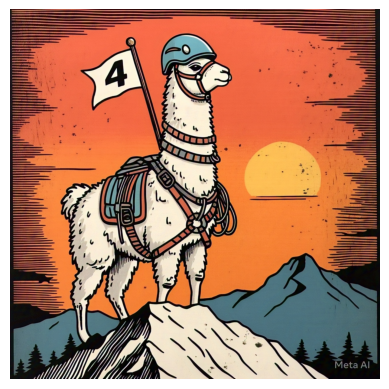

In [23]:
img_url = "../src/docs/img/a_llama_dressed_as_a_professional_mountain.jpeg"
display(img_url)

In [24]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": img_url},
            {"type": "text", "text": "Describe this image in two sentences."},
        ]
    },
]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=256,
)

response = processor.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])[0]
print(response)

The image depicts a cartoon llama standing on a rocky outcropping, proudly holding a flag with the number "4" on it. The llama is adorned with a blue helmet and a saddle, set against a vibrant orange sky with a sunset or sunrise backdrop, featuring mountains and trees in the distance.<|eot|>


<a id='mm2'></a>
### Multimodal: Understanding Multiple Images

Llama 4 Scout can process information from multiple images - the number of images you can pass in a single request is only limited by the available memory. To prevent OOM errors, try downsizing the images before passing it to the model. 

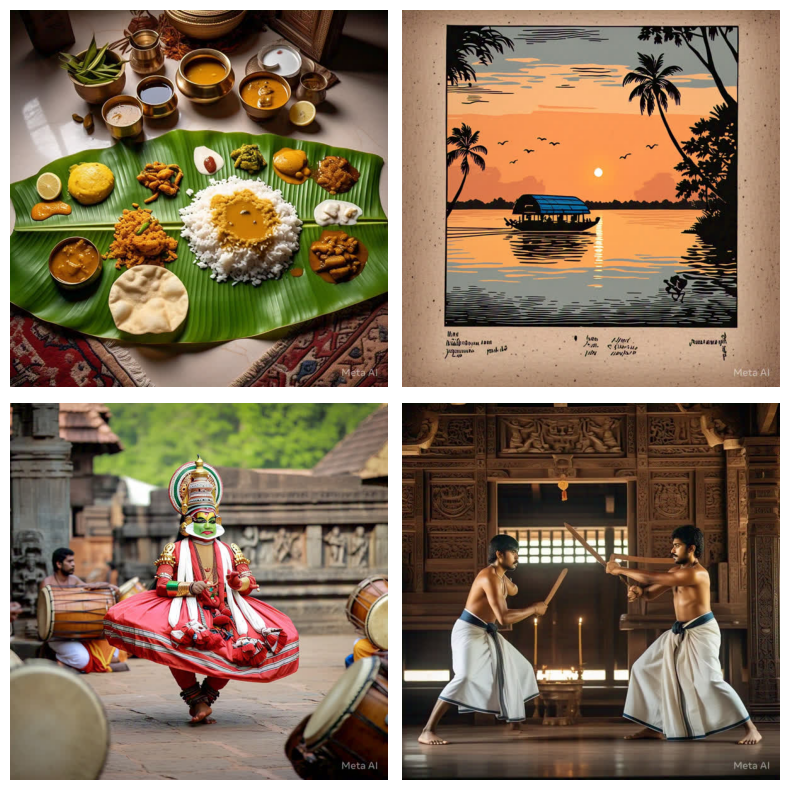

In [25]:
images = ["../src/docs/img/k1.jpg", "../src/docs/img/k2.jpg", "../src/docs/img/k3.jpg", "../src/docs/img/k4.jpg"]
resized_imgs = [resize(im) for im in images]
display_grid(resized_imgs)

We pass these 4 downscaled images to Llama 4, and ask it to guess what location these are about. And just for fun, we ask it to write a couplet describing this place.

In [26]:
content = [{"type": "image", "url": u} for u in resized_img]
content += {"type": "text", "text": "Look at these photos in my camera roll. Now write a couplet about the place I am in."},

messages = [
    {
        "role": "user",
        "content": content
    },
]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=256,
)

response = processor.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])[0]
print(response)


In Kerala's land of beauty bright,
Where culture and nature entwine in delight.<|eot|>


<a id='fc'></a>
## Function Calling

Function calling now works natively with images, i.e. the model can understand the images and return the appropriate function-call. In this example, we ask Llama to book us tickets to the place shown in the photos.

In [27]:
functions_prompt = """
You have access to the following functions:
1.  **Book Travel Tickets**: Use this function to assist users in booking travel tickets.
    `{   "name": "book_travel_tickets",   "description": "Books travel tickets for the user",   "parameters": {     "destination": {"description": "The destination of the travel", "param_type": "str", "required": true},     "travel_dates": {"description": "The dates of travel", "param_type": "str", "required": true},     "number_of_passengers": {"description": "The number of passengers", "param_type": "int", "required": true},     "travel_class": {"description": "The preferred travel class (e.g., economy, business)", "param_type": "str", "required": false}   } }`

2.  **Check Weather**: Use this function to provide current weather information for a specified location.    
    `{   "name": "check_weather",   "description": "Checks the current weather for a specified location",   "parameters": {     "location": {"description": "The location to check the weather for", "param_type": "str", "required": true}   } }`
    
Think very carefully before calling functions. If you choose to call a function, ONLY reply in the following format with no prefix or suffix:

<function=example\_function\_name>{"example\_name": "example\_value"}</function>

Reminder:

*   Function calls MUST follow the specified format, start with <function= and end with </function>
*   Required parameters MUST be specified
*   Only call one function at a time
*   Put the entire function call reply on one line"""


messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": resized_img[0]},
            {"type": "image", "url": resized_img[1]},
            {"type": "text", "text": f"{functions_prompt}\n\nBook me tickets to go the place shown in these photos"}
        ]
    }
]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=256,
)

response = processor.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])[0]
print(response)

<function=book_travel_tickets>{"destination": "Kerala, India", "travel_dates": "2024-03-20 to 2024-03-25", "number_of_passengers": "2", "travel_class": "economy"}<|eot|>


The function definitions can also be passed in the system prompt instead. Let's also change the definition format to JSON:

In [28]:
function_definitions = """Here is a list of functions in JSON format that you can invoke:
[
    {
        "name": "get_user_info",
        "description": "Retrieve details for a specific user by their unique identifier. Note that the provided function is in Python 3 syntax.",
        "parameters": {
            "type": "dict",
            "required": [
                "user_id"
            ],
            "properties": {
                "user_id": {
                "type": "integer",
                "description": "The unique identifier of the user. It is used to fetch the specific user details from the database."
            },
            "special": {
                "type": "string",
                "description": "Any special information or parameters that need to be considered while fetching user details.",
                "default": "none"
                }
            }
        }
    }
]

Should you decide to return the function call(s), put them in the format of [func1(params_name=params_value, params_name2=params_value2...), func2(params)]

You SHOULD NOT include any other text in the response."""

messages = [
    {
        "role": "system",
        "content": function_definitions
    },
    {
        "role": "user",
        "content": "Can you retrieve the details for the user with the ID 7890, who has black as their special request?"
    }
]

inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=256,
)

response = processor.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])[0]
print(response)

[get_user_info(user_id=7890, special='black')]<|eot|>
